In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-airline-flight-routes-and-fares-1993-2024/US Airline Flight Routes and Fares 1993-2024.csv


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

In [57]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

In [10]:
# Importing CSV file
df = pd.read_csv('/kaggle/input/us-airline-flight-routes-and-fares-1993-2024/US Airline Flight Routes and Fares 1993-2024.csv', low_memory=False)

In [11]:
df.isnull().sum()

tbl                   0
Year                  0
quarter               0
citymarketid_1        0
citymarketid_2        0
city1                 0
city2                 0
airportid_1           0
airportid_2           0
airport_1             0
airport_2             0
nsmiles               0
passengers            0
fare                  0
carrier_lg         1540
large_ms           1540
fare_lg            1540
carrier_low        1612
lf_ms              1612
fare_low           1612
Geocoded_City1    39206
Geocoded_City2    39206
tbl1apk               0
dtype: int64

In [12]:
df.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


In [13]:
df = df.dropna()

In [14]:
df.isnull().sum()

tbl               0
Year              0
quarter           0
citymarketid_1    0
citymarketid_2    0
city1             0
city2             0
airportid_1       0
airportid_2       0
airport_1         0
airport_2         0
nsmiles           0
passengers        0
fare              0
carrier_lg        0
large_ms          0
fare_lg           0
carrier_low       0
lf_ms             0
fare_low          0
Geocoded_City1    0
Geocoded_City2    0
tbl1apk           0
dtype: int64

In [15]:
df.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
5919,Table 1a,2010,1,34614,33195,"Salt Lake City, UT","Tampa, FL (Metropolitan Area)",14869,15304,SLC,...,226.59,DL,0.38,247.69,US,0.20,166.99,"Salt Lake City, UT\n(40.758478, -111.888142)","Tampa, FL (Metropolitan Area)\n(37.8606, -78.8...",201011486915304SLCTPA
5920,Table 1a,1998,4,30189,31703,"Colorado Springs, CO","New York City, NY (Metropolitan Area)",11109,12197,COS,...,280.39,UA,0.73,292.60,NW,0.24,248.27,"Colorado Springs, CO\n(38.835224, -104.819798)","New York City, NY (Metropolitan Area)\n(40.123...",199841110912197COSHPN
5921,Table 1a,1998,4,30198,30852,"Pittsburgh, PA","Washington, DC (Metropolitan Area)",14122,10821,PIT,...,239.12,US,0.93,245.70,CO,0.03,71.30,"Pittsburgh, PA\n(40.442169, -79.994945)","Washington, DC (Metropolitan Area)\n(38.892062...",199841412210821PITBWI
5922,Table 1a,2009,3,32211,32575,"Las Vegas, NV","Los Angeles, CA (Metropolitan Area)",12889,14908,LAS,...,111.74,WN,0.58,118.28,US,0.41,102.75,"Las Vegas, NV\n(36.169202, -115.140597)","Los Angeles, CA (Metropolitan Area)\n(34.05223...",200931288914908LASSNA
5923,Table 1a,1993,4,30255,30852,"Huntsville, AL","Washington, DC (Metropolitan Area)",12217,12264,HSV,...,242.76,DL,0.48,275.50,UA,0.25,197.69,"Huntsville, AL\n(34.729538, -86.585283)","Washington, DC (Metropolitan Area)\n(38.892062...",199341221712264HSVIAD


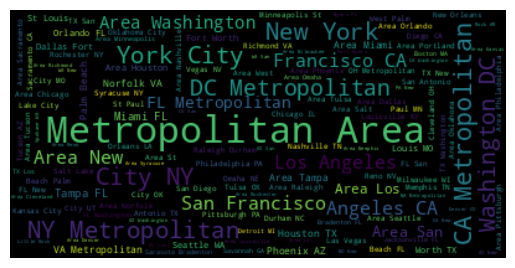

<Figure size 4000x3000 with 0 Axes>

In [16]:
# WordCloud
text = " ".join(i for i in df.city2)  # butun satirlar tek metinde kaydedilir

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.figure(figsize=[40, 30])
plt.show()

* Yukarıdaki wordcloud'da uçuşların varış şehirleri gösterilmektedir. En çok uçusun yapıldığı şehirler, daha belirgin bir şekilde gösterilmiştir.

In [17]:
df = df.drop(columns = ["tbl" , "citymarketid_1", "citymarketid_2" , "city1" , "city2" , "Geocoded_City1", "Geocoded_City2", "tbl1apk"])

In [18]:
label_encoder = preprocessing.LabelEncoder() 

cols = ["carrier_lg", "carrier_low", "airport_1", "airport_2"]

for col in cols:
    # Encode labels in column 'species'. 
    df[col]= label_encoder.fit_transform(df[col]) 

    df[col].unique()

* Label Encoding ile kategorik veriler sayısal verilere dönüştürüldü.

In [19]:
df_corr = df[['Year', 'airportid_1', 'airportid_2', 'fare','carrier_low','carrier_lg']]

In [20]:
df_corr.head()

,Year,airportid_1,airportid_2,fare,carrier_low,carrier_lg
5919,2010,14869,15304,226.59,56,11
5920,1998,11109,12197,280.39,34,50
5921,1998,14122,10821,239.12,11,52
5922,2009,12889,14908,111.74,56,56
5923,1993,12217,12264,242.76,54,11


In [21]:
df_corr = df_corr.corr()

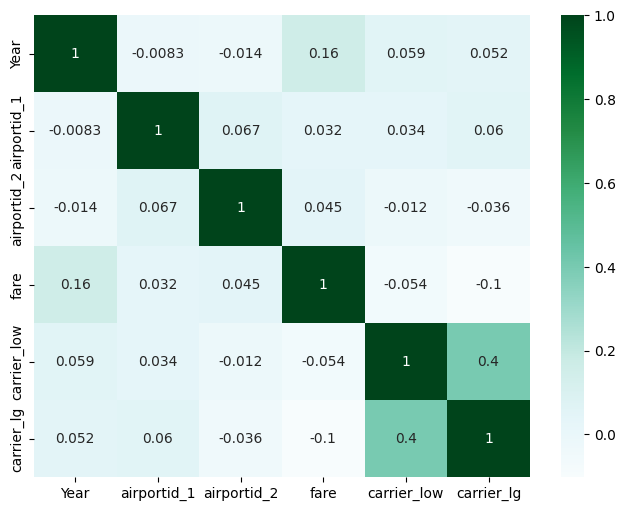

In [22]:
plt.figure(figsize = (8, 6))
sns.heatmap(data = df_corr, annot = True, cmap = 'BuGn')
plt.show()

* Bu tablo, değişkenlerin birbirleri arasındaki ilişkiyi temsil etmektedir. 1'e daha yakın olan değerler iki değişken arasındaki ilişkinin daha yüksek olduğunu gösterir. 
* Örneğin "fare" ve "Year" değişkenleri arasındaki ilişki diğer değişkenlere göre daha yüksektir.

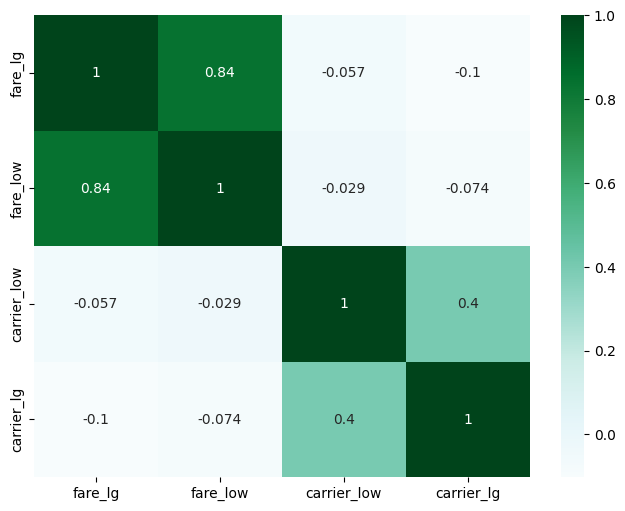

In [23]:
df_corr = df[["fare_lg","fare_low",'carrier_low','carrier_lg']]
df_corr = df_corr.corr()
plt.figure(figsize = (8, 6))
sns.heatmap(data = df_corr, annot = True, cmap = 'BuGn')
plt.show()

* Bu ısı haritasına göre "fare_low" ve "fare_lg" arasındaki ilişinin 1'e yakın olması bu iki değişken arasındaki ilişkinin yüksek olduğunu gösterir.

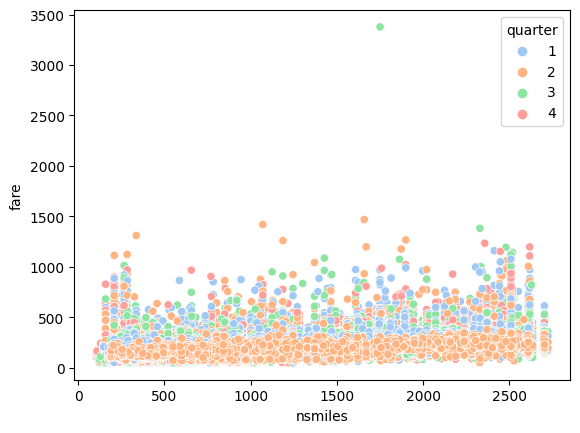

In [62]:

sns.scatterplot(data = df, x = "nsmiles", y = "fare",hue="quarter", palette = sns.color_palette('pastel'))
plt.show()

* Bu grafikte,"nsmiles" ve "fare" değişkenlerinin ilişkisinin yılın çeyreklerine yani "quarter" değişkenine göre dağılımını görüyoruz.

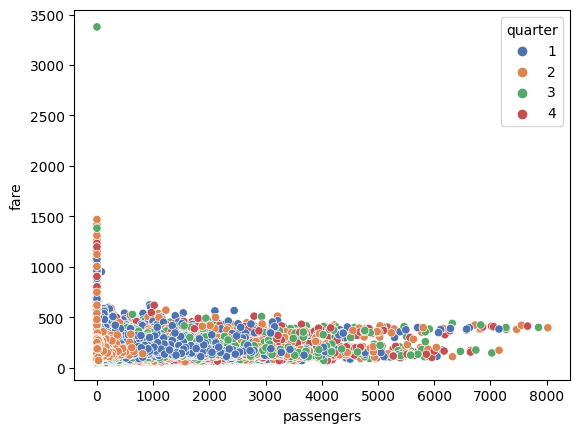

In [63]:
sns.scatterplot(data = df, x = "passengers", y = "fare",hue="quarter", palette = sns.color_palette('deep'))
plt.show()

* Bu grafik, yılın çeyreklerinde, yolcuların ödediği ücretin yolcu sayısına göre dağılımını gösterir.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205189 entries, 5919 to 222942
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         205189 non-null  int64  
 1   quarter      205189 non-null  int64  
 2   airportid_1  205189 non-null  int64  
 3   airportid_2  205189 non-null  int64  
 4   airport_1    205189 non-null  int64  
 5   airport_2    205189 non-null  int64  
 6   nsmiles      205189 non-null  int64  
 7   passengers   205189 non-null  int64  
 8   fare         205189 non-null  float64
 9   carrier_lg   205189 non-null  int64  
 10  large_ms     205189 non-null  float64
 11  fare_lg      205189 non-null  float64
 12  carrier_low  205189 non-null  int64  
 13  lf_ms        205189 non-null  float64
 14  fare_low     205189 non-null  float64
dtypes: float64(5), int64(10)
memory usage: 25.0 MB


In [27]:
y = df[["fare"]]
x = df.drop("fare", axis=1)

* y bağımlı değişkeni hedef değer olan ücreti, x bağımsız değişkenleri ise bu ücreti etkileyen faktörleri temsil etmektedir.

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.70,random_state=22)

# **Linear Regression**

In [29]:
lm = LinearRegression()
model=lm.fit(x,y)

In [30]:
model.score(x, y)

0.9398350788808405

In [31]:
lm = LinearRegression()
model = lm.fit(x_train,y_train)
model.score(x_test,y_test)

0.9369784090217131

In [42]:
lm.fit(x_train, y_train)
y_test_p = lm.predict(x_test)
test_r2 = r2_score(y_test, y_test_p)

print(f"Model: Linear Regression")
print(f"Test R-Squared Score: {test_r2:.5f}\n")

scores = cross_validate(lm, x_train, y_train,
                            scoring = ['r2', 'neg_mean_absolute_error',
                                       'neg_mean_squared_error', 
                                       'neg_mean_absolute_percentage_error'],
                            cv = 10, return_train_score = False)

scores = pd.DataFrame(scores, index = range(1,11))

print(scores.iloc[:, 2:].mean().abs().apply("{:.5f}".format))


Model: Linear Regression
Test R-Squared Score: 0.93698

test_r2                                      0.94106
test_neg_mean_absolute_error                10.44058
test_neg_mean_squared_error                373.77968
test_neg_mean_absolute_percentage_error      0.04757
dtype: object


* Burada seçilen linear regression modelinin; r squared, MAE, MSE, MAPE değerlerini bulduk.

# **Decision Tree**

In [43]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [44]:
dt.score(x_test, y_test)

0.9177736791992153

In [45]:
dt.fit(x_train, y_train)
y_test_p = dt.predict(x_test)
test_r2 = r2_score(y_test, y_test_p)

print(f"Model: Decision Tree")
print(f"Test R-Squared Score: {test_r2:.5f}\n")

scores = cross_validate(dt, x_train, y_train,
                            scoring = ['r2', 'neg_mean_absolute_error',
                                       'neg_mean_squared_error', 
                                       'neg_mean_absolute_percentage_error'],
                            cv = 10, return_train_score = False)

scores = pd.DataFrame(scores, index = range(1,11))

print(scores.iloc[:, 2:].mean().abs().apply("{:.5f}".format))

Model: Decision Tree
Test R-Squared Score: 0.91637

test_r2                                      0.91303
test_neg_mean_absolute_error                10.38455
test_neg_mean_squared_error                552.85550
test_neg_mean_absolute_percentage_error      0.04523
dtype: object


* Burada seçilen decision tree modelinin; r squared, MAE, MSE, MAPE değerlerini bulduk.

# **K-Nearest Neighbor - KNN**

In [46]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [47]:
knn.score(x_test, y_test)

0.9140091664141515

In [48]:
knn.fit(x_train, y_train)
y_test_p = knn.predict(x_test)
test_r2 = r2_score(y_test, y_test_p)

print(f"Model: K-Nearest Neighbor - KNN")
print(f"Test R-Squared Score: {test_r2:.5f}\n")

scores = cross_validate(knn, x_train, y_train,
                            scoring = ['r2', 'neg_mean_absolute_error',
                                       'neg_mean_squared_error', 
                                       'neg_mean_absolute_percentage_error'],
                            cv = 10, return_train_score = False)

scores = pd.DataFrame(scores, index = range(1,11))

print(scores.iloc[:, 2:].mean().abs().apply("{:.5f}".format))

Model: K-Nearest Neighbor - KNN
Test R-Squared Score: 0.91401

test_r2                                      0.90381
test_neg_mean_absolute_error                13.97349
test_neg_mean_squared_error                612.29256
test_neg_mean_absolute_percentage_error      0.06722
dtype: object


# **K-Ortalama (k-Means) Kümeleme**

In [66]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(x)

y = y.values.ravel()  

# Kümeleri değerlendirmek için Adjusted Rand Index kullan
print("Adjusted Rand Index:", adjusted_rand_score(y, kmeans.labels_))
print("Homojenlik Skoru:", homogeneity_score(y, kmeans.labels_))
print("Completentlik Skoru:", completeness_score(y, kmeans.labels_))
print("V-Measure Skoru:", v_measure_score(y, kmeans.labels_))

Adjusted Rand Index: 8.944633237184993e-08
Homojenlik Skoru: 0.01023563676006961
Completentlik Skoru: 0.1506288260963362
V-Measure Skoru: 0.01916870789409901


# **MODEL SEÇİMİ**

* Gözetimli ve gözetimsiz öğrenme algoritma skorlarına göre en iyi skora sahip olan model olan linear regresion modeli ile hiperparametre optimizasyonu ile devam ediyoruz

# **HİPERPARAMETRE OPTİMİZASYONU**

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from scipy.stats import uniform

In [74]:
ridge = Ridge()


param_grid = {
    'alpha': np.logspace(-4, 4, 50)  
}


grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


grid_search.fit(x_train, y_train)


print("Best parameters:", grid_search.best_params_)


print("Best score (MSE):", grid_search.best_score_)



Best parameters: {'alpha': 24.420530945486497}
Best score (MSE): -373.7871806076861


In [75]:

y_pred_continuous = model.predict(x_train)


threshold = np.mean(y_train)  


y_train_class = np.where(y_train >= threshold, 1, 0)


y_pred_class = np.where(y_pred_continuous >= threshold, 1, 0)


accuracy = accuracy_score(y_train_class, y_pred_class)
precision = precision_score(y_train_class, y_pred_class)
recall = recall_score(y_train_class, y_pred_class)
f1 = f1_score(y_train_class, y_pred_class)


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.9489668040548067
Precision: 0.9423198653718485
Recall: 0.9443902891890638
F1 Score: 0.9433539412673878
